<a href="https://colab.research.google.com/github/RithwikMohan/ML_Lab/blob/main/PCA_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

# Loading dataset
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

# Features & target
X = df.drop("target", axis=1)
y = df["target"]

# Train/Test spliting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

print("Shape:", df.shape)
print("Train:", X_train.shape, "Test:", X_test.shape)


Shape: (442, 11)
Train: (309, 10) Test: (133, 10)


# **PCA**


 PCA Explained Variance Ratio:
[0.40242108 0.14923197]


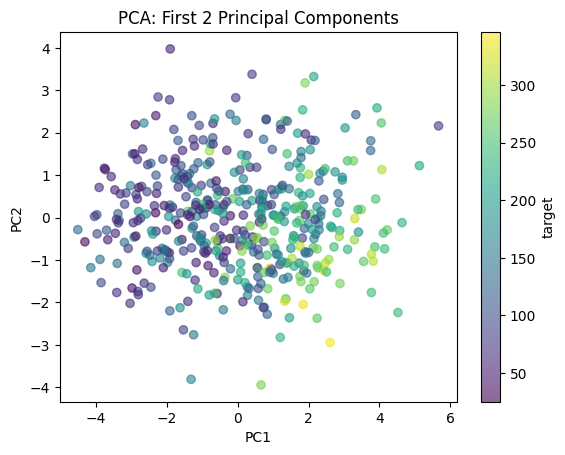

'Each dot = one patient.\n\nColor of the dot => their disease progression score (target).\nPurple = low disease progression\nYellow = high disease progression'

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)#two new features pc1 ans pc2->linear combinations of original features(reducing from n features to 2)
X_pca = pca.fit_transform(X_scaled)#2D array with shape (n_samples, 2) col1 is pc1 and col2 is pc2 and rows are each data sample

print("\n PCA Explained Variance Ratio:")
print(pca.explained_variance_ratio_)#pc1 % oftotal variance in data and pc2 % of total variance in data

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.6)#visualization->high-dimensional data squashed into 2D while keeping as much variation as possibles
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA: First 2 Principal Components")
plt.colorbar(label='target')
plt.show()
"""Each dot = one patient.

Color of the dot => their disease progression score (target).
Purple = low disease progression
Yellow = high disease progression"""


# **LDA**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name="target")


 LDA Explained Variance Ratio:
[0.95914876 0.04085124]


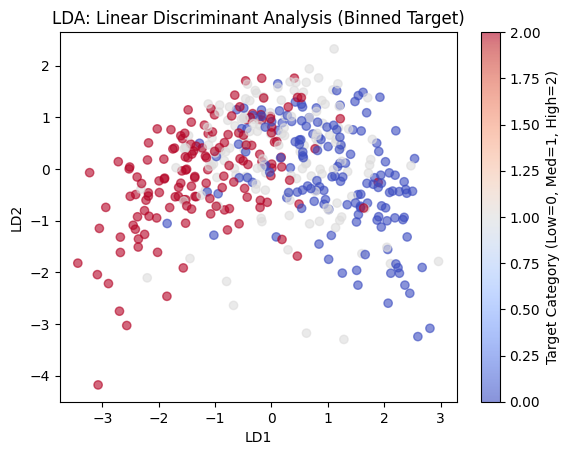

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_cat = pd.qcut(y, q=3, labels=["Low", "Medium", "High"])
lda = LDA(n_components=2)#same like pca 2 components
X_lda = lda.fit_transform(X_scaled, y_cat)

print("\n LDA Explained Variance Ratio:")
print(lda.explained_variance_ratio_)#ld1 and ld2 % variance contribution

plt.scatter(X_lda[:, 0], X_lda[:, 1],
            c=y_cat.cat.codes, cmap="coolwarm", alpha=0.6)#visualization

plt.xlabel("LD1")
plt.ylabel("LD2")
plt.title("LDA: Linear Discriminant Analysis (Binned Target)")
plt.colorbar(label="Target Category (Low=0, Med=1, High=2)")
plt.show()
